In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from nltk.stem.snowball import SnowballStemmer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

%matplotlib inline

In [3]:
# import train data

In [4]:
df_train = pd.read_csv('data/train.csv', encoding='ISO-8859-1')

In [6]:
df_train

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00


In [637]:
df_train = df_train.drop('id', axis=1)

In [638]:
# import attribute data for both train and test data

In [639]:
df_attr = pd.read_csv('data/attributes.csv', encoding='ISO-8859-1')

In [640]:
# discard nan rows

In [641]:
df_attr = df_attr[np.isfinite(df_attr['product_uid'])]

In [642]:
# import product description data for both train and test data

In [643]:
df_dsp = pd.read_csv('data/product_descriptions.csv', encoding='ISO-8859-1')

In [644]:
# import test data

In [719]:
df_test = pd.read_csv('data/test.csv', encoding='ISO-8859-1')

In [720]:
id_test = df_test['id']

In [646]:
df_test = df_test.drop('id', axis=1)

In [647]:
# stemmer to extract stmmer of english words

In [648]:
stemmer = SnowballStemmer('english')

In [649]:
def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [650]:
def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

In [651]:
# distribution of relevance values in train data

(array([  2.10500000e+03,   3.01000000e+03,   5.00000000e+00,
          6.78900000e+03,   0.00000000e+00,   1.17300000e+04,
          1.60710000e+04,   1.90000000e+01,   1.52130000e+04,
          1.91250000e+04]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

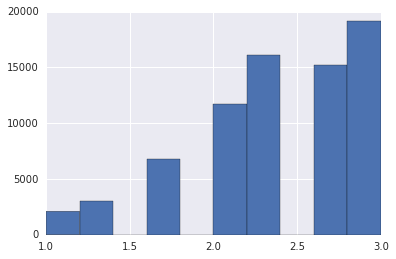

In [652]:
plt.hist(df_train.relevance)

In [653]:
# distribution of search terms length in train data

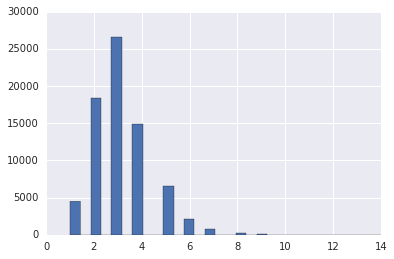

In [654]:
(df_train.search_term.str.count("\\s+") + 1).hist(bins=30)
# \s matches any whitespace character

In [655]:
# df_train['search_term_len'] = df_train.search_term.str.count('\s')+1

In [656]:
# merge peoduct descriprion into train and test data

In [657]:
df_train = pd.merge(df_train, df_dsp, on='product_uid')

In [658]:
df_test = pd.merge(df_test, df_dsp, on='product_uid')

In [659]:
# group attribute data by product_uid and combine all text for each uid

In [660]:
gb_attr = df_attr.groupby('product_uid')

In [661]:
df_attr_combi = pd.DataFrame()

In [662]:
df_attr_combi['product_uid'] = np.unique(df_attr['product_uid'])

In [663]:
df_attr_combi['attribute'] = [' '.join([str(n) + ' ' + str(v) for (n, v) in zip(
        gb_attr.get_group(uid)['name'],
        gb_attr.get_group(uid)['value'])
        ])for uid in df_attr_combi['product_uid']]

In [664]:
# merge attribute data into train and test data

In [665]:
df_train = pd.merge(df_train, df_attr_combi, how='left', on='product_uid')

In [666]:
df_test = pd.merge(df_test, df_attr_combi, how='left', on='product_uid')

In [667]:
# combine all text data into one feature -- title + description + attribute

In [668]:
df_train['all_text'] = df_train['product_title']+ ' ' + df_train['product_description']+' '+ df_train['attribute']

In [669]:
df_test['all_text'] = df_test['product_title']+ ' ' + df_test['product_description']+' '+ df_test['attribute']

In [674]:
feature_cols = ['product_uid', 'product_title', 'product_description', 
                'attribute', 'all_text','search_term']

In [676]:
df_train[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 0 to 74066
Data columns (total 6 columns):
product_uid            74067 non-null int64
product_title          74067 non-null object
search_term            74067 non-null object
product_description    74067 non-null object
attribute              56547 non-null object
all_text               56547 non-null object
dtypes: int64(1), object(5)
memory usage: 4.0+ MB


In [677]:
df_test[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166693 entries, 0 to 166692
Data columns (total 6 columns):
product_uid            166693 non-null int64
product_title          166693 non-null object
search_term            166693 non-null object
product_description    166693 non-null object
attribute              138388 non-null object
all_text               138388 non-null object
dtypes: int64(1), object(5)
memory usage: 8.9+ MB


digit_cols = ['search_term_len' ,'term_in_dsp', 'term_in_title', 
        'term_in_attr', 'term_in_all', 'relevance']

corr = df_train[digit_cols].corr()

fig, ax = plt.subplots()
heatmap = plt.pcolor(corr, cmap=plt.cm.Blues, alpha=0.7)
ax.set_yticks(np.arange(len(digit_cols)) + 0.5, minor=False)
ax.set_xticks(np.arange(len(digit_cols)) + 0.5, minor=False)
ax.set_xticklabels(digit_cols, rotation=90)
ax.set_yticklabels(digit_cols)
plt.colorbar()

In [627]:
class ItemSelector(BaseEstimator, TransformerMixin):
    '''
    this transformer is used to select subset of data at provided keys 
    
    Parameters
    ----------
    key : list, required
        list-like 
        The key corresponding to the column index of the dataframe.
    '''
    def __init__(self, key):
        self.key = key
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.ix[:, self.key]

In [707]:
class Len_text(BaseEstimator, TransformerMixin):
    '''
    this transformer is used to calculate length of a text
    '''
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # X is a dataframe
        new_X = []
        for c in X.columns:
            new_X.append(X[c].str.count('\s')+1)
        return np.array(new_X).reshape(-1, 1)

In [708]:
class Stemm_text(BaseEstimator, TransformerMixin):
    '''
    this transformer is used to extract the stemmers of words in a text
    '''
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # X is a dataframe
        new_X = []
        for c in X.columns:
            new_X.append([str_stemmer(str(s)) for s in X[c]])
        return new_X

In [761]:
class Commen_word(BaseEstimator, TransformerMixin):
    '''
    check how many commen words two texts have
    '''
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # X is a list
        return np.array([str_common_word(a, b) for (a, b) in zip(X[1], X[0])]).reshape(-1, 1) 

In [751]:
df_train[feature_cols].columns

Index(['product_uid', 'product_title', 'search_term', 'product_description',
       'attribute', 'all_text'],
      dtype='object')

In [752]:
feat_union = FeatureUnion(
        transformer_list=[
            ('term_len', Pipeline([
                ('selector', ItemSelector(key=[2])),
                ('text_length', Len_text()),
            ])),
            ('term_in_title', Pipeline([
                ('selector', ItemSelector(key=[1, 2])),
                ('stemm_text', Stemm_text()),
                ('commen_word', Commen_word()),
            ])),
            ('term_in_dsp', Pipeline([
                ('selector', ItemSelector(key=[3, 2])),
                ('stemm_text', Stemm_text()),
                ('commen_word', Commen_word()),
            ])),
            #('term_in_attr', Pipeline([
             #   ('selector', ItemSelector(key=[4, 2])),
              #  ('stemm_text', Stemm_text()),
               # ('commen_word', Commen_word()),
            #])),
           # ('term_in_all', Pipeline([
            #    ('selector', ItemSelector(key=[5, 2])),
             #   ('stemm_text', Stemm_text()),
              #  ('commen_word', Commen_word()),
            #])),
        ],
        n_jobs=5
    )


In [753]:
rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)

In [754]:
pipeline = Pipeline([
        ('feat_union', feat_union),
        #('model', RandomForestRegressor(n_estimators=100))   
        ('model', clf)
    ])

In [756]:
%time pipeline.fit(df_train[feature_cols], df_train['relevance'].values)

CPU times: user 5.08 s, sys: 1.26 s, total: 6.34 s
Wall time: 3min 31s


Pipeline(steps=[('feat_union', FeatureUnion(n_jobs=5,
       transformer_list=[('term_len', Pipeline(steps=[('selector', ItemSelector(key=[2])), ('text_length', Len_text())])), ('term_in_title', Pipeline(steps=[('selector', ItemSelector(key=[1, 2])), ('stemm_text', Stemm_text()), ('commen_word', Commen_word(...n_estimators=45, n_jobs=1, oob_score=False,
         random_state=25, verbose=0, warm_start=False))])

In [757]:
%time y_pred = pipeline.predict(df_test)

CPU times: user 7.67 s, sys: 3.03 s, total: 10.7 s
Wall time: 8min 13s


In [758]:
# create a submission

In [759]:
pd.DataFrame({'id': id_test, 'relevance': y_pred}).to_csv('submission_4.csv',index=False)

In [762]:
# 0.49778